In [1]:
from mu2e import mu2e_ext_path
from mu2e.dataframeprod import g4root_to_df
from root_pandas import read_root
import pandas as pd
from mu2e.mu2eplots import mu2e_plot3d_ptrap
from mu2e.mu2eplots import mu2e_plot3d_ptrap_traj
from mu2e.mu2eplots import mu2e_plot3d_ptrap_anim
import cPickle as pkl
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)

Welcome to JupyROOT 6.08/02


/usr/local/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning:

The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.

/usr/local/lib/python2.7/site-packages/IPython/utils/traitlets.py:5: UserWarning:

IPython.utils.traitlets has moved to a top-level traitlets package.



<IPython.core.display.Javascript object>

In [19]:
try:
    del df_ntpart
    del df_nttvd
except:
    pass
df_ntpart, df_nttvd, _ = g4root_to_df('/Volumes/DataDump/Mu2E/cosmics/p1400_v2/cosmics_combined_4',
                                     do_basic_modifications=True, trees = ['tvd', 'part'])

In [20]:
df_nttvd.query('-1000<=x<=1000 and -1000<=y<=1000 and 12600<=z<=13200')['time'].describe()

count    775578.000000
mean         35.268555
std           1.941221
min          33.333027
25%          34.049244
50%          35.014774
75%          36.034458
max         106.029648
Name: time, dtype: float64

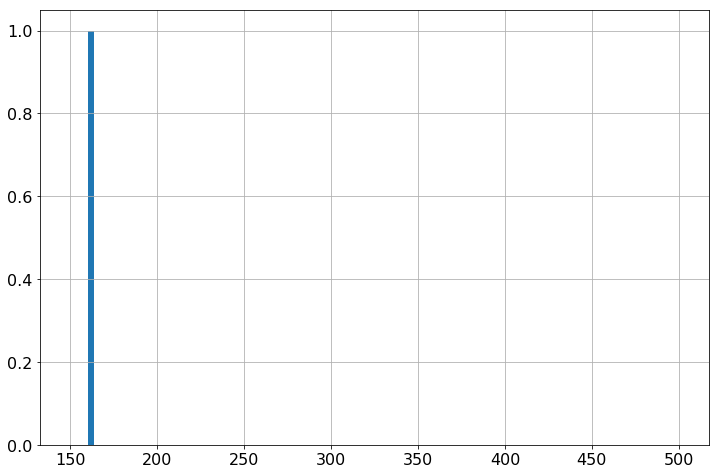

In [21]:
df_ntpart.tstop.hist(bins=100, range=(150,500))

In [ ]:
store_xray = pd.HDFStore('/Volumes/DataDump/Mu2E/G4ParticleSim/low_e_ele_0T_v580.h5')
df_xray = store_xray.df_ntpart
store_xray.close()

In [ ]:
df_mu_single = df_nttvd.query('runevt==391025').sort_values('time')
#df_mu_single = pd.concat([df_mu_single[0:20], df_mu_single[-20:]])
df_mu_single.name = 'Muon'

In [ ]:
df_mu_single.p.describe()

In [ ]:
mu2e_plot3d_ptrap_traj(df_mu_single,'z','x','y',df_xray=df_xray, y_range=(-2000,2000), z_range=(-1000, 10000), aspect='cosmic',
                        title='Trapped Muon Trajetory', color_mode='mom')

In [ ]:
cnts = df_nttvd.groupby('1773').count()
cnts[cnts.evt==75]

In [ ]:
df_mu_single

In [ ]:
df_nttvd.query('-800<=x<=800 and -800<=y<=800 and 12600<=z<=13200')['p'].hist(bins=20)

In [ ]:
df_nttvd.query('-800<=x<=800 and -800<=y<=800 and 12600<=z<=13200 and 220<time<230')

In [6]:
df_enter_zone = df_nttvd.query('-800<=x<=800 and -800<=y<=800 and 12600<=z<=13200')

In [7]:
df_enter_zone = df_enter_zone.sort_values('time').drop_duplicates(subset='runevt')

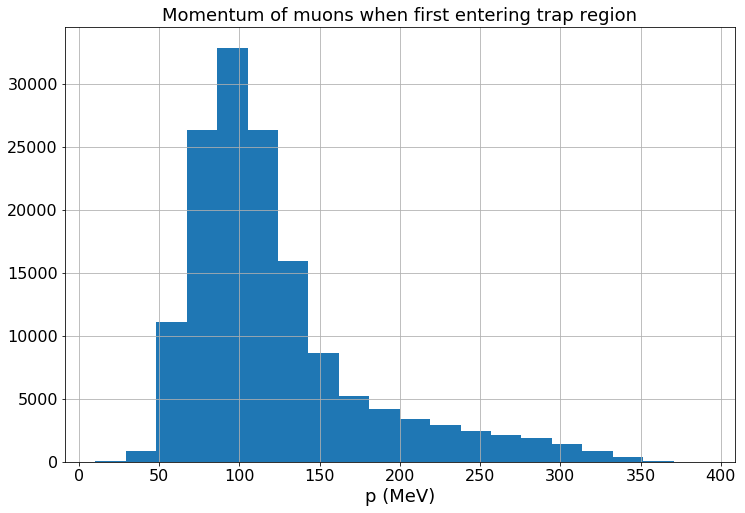

In [12]:
df_enter_zone.p.hist(bins=20)
plt.title('Momentum of muons when first entering trap region')
plt.xlabel('p (MeV)')

In [ ]:
len(df_ntpart.runevt.unique())

In [ ]:
df_std_cosmic_height = df_nttvd.query('10947<=y<=10948').sort_values('time').drop_duplicates(subset='runevt')

In [ ]:
df_std_cosmic_height.query('p>1460').p.hist(bins=100)
plt.title('Momentum of muons at general cosmic sim height')
plt.xlabel('p (MeV)')

In [ ]:
df_std_cosmic_height.head()